# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

#### Original Exploration

[18_Matplotlib_Box_Plots.ipynb](../2_Advanced/18_Matplotlib_Box_Plots.ipynb)  
[19_Exercise_Skill_Pay_Analysis.ipynb](../2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb)

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alexm\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Salary Distribution by Job Title

Filter our data to only include salary values from the Europe Union.

In [2]:
# filter for the job titles and country
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden'
]

df_EU = df[(df['job_country'].isin(eu_countries))].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [18]:
excluded_roles = ['Software Engineer', 'Machine Learning Engineer']
df_filtered = df_EU[~df_EU['job_title_short'].isin(excluded_roles)]

job_titles = df_filtered['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_EU_top6 = df_EU[df_EU['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_EU_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

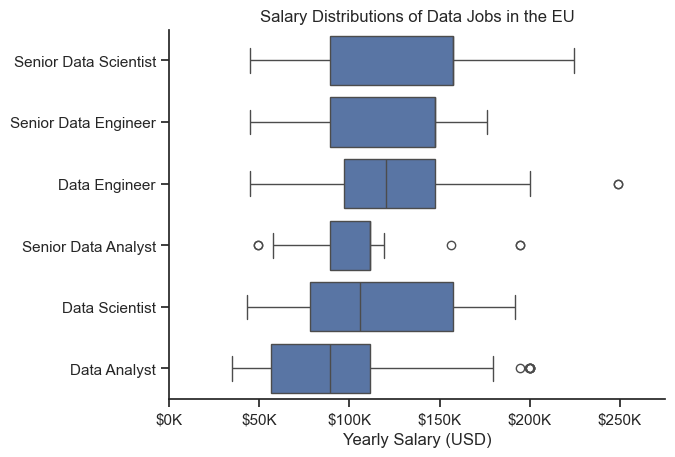

In [22]:
sns.boxplot(data=df_EU_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the EU')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 275000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is from Europe Union, to create a new DataFrame `df_DA_EU`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [26]:
# List to get EU countries
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden'
]

# Only get data analyst jobs in the EU
df_DA_EU = df[(df['job_country'].isin(eu_countries)) & (df['job_title_short'] == 'Data Analyst')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_EU = df_DA_EU.dropna(subset=['salary_year_avg'])

df_DA_EU = df_DA_EU.explode('job_skills')

df_DA_EU[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
1555,111175.0,databricks


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the `df_DA_EU`. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (`df_DA_top_pay`) with a reset index and a renamed salary column labeled 'median_salary'.

In [27]:
df_DA_top_pay = df_DA_EU.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
c,1,200000.00
terraform,2,165100.75
mongo,1,165000.00
nosql,12,164391.00
unify,1,163782.00
smartsheet,1,155000.00
linux,4,152952.25
asana,1,147500.00
slack,1,147500.00


Calculates the count and median salary for each skill in `df_DA_EU`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [28]:
df_DA_skills = df_DA_EU.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
looker,36,111175.0
spark,40,108087.5
azure,45,102500.0
sql,198,100500.0
python,145,98500.0
tableau,102,98500.0
r,55,98500.0
power bi,62,89152.0
sap,28,89100.0


Creates two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

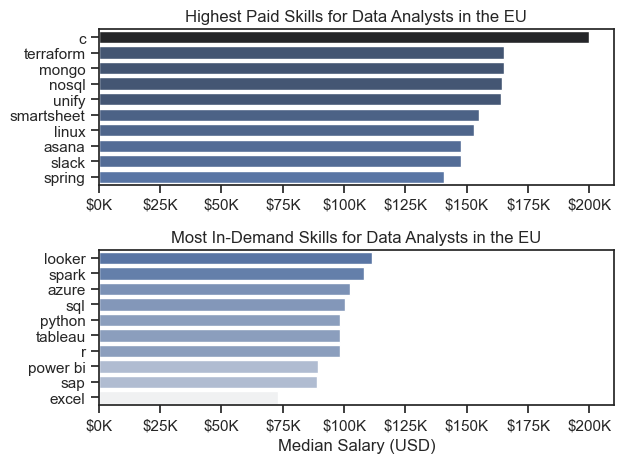

In [30]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the EU')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the EU')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()